# 🎧 What Drives Music Popularity?
## Notebook 04 — Exploratory Data Analysis (EDA)
Testing early evidence for:
1) Artist popularity → Track popularity  
2) Momentum from previous releases → Track popularity *(future feature)*  
3) Audio features → Track popularity

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

class MusicPalette:
    spotify = "#1DB954"   # platform / artist power
    apple = "#FF375F"     # target / popularity / outcome
    navy = "#1D3557"      # behavioral / audio features
    teal = "#2A9D8F"      # secondary analytic / comparisons
    violet = "#6A4C93"    # temporal / momentum / artist history
    amber = "#F4A261"     # feature emphasis
    gold = "#E9C46A"      # highlight (hits / top segments)
    cyan = "#4CC9F0"      # auxiliary / lighter contrasts
    gray = "#6C757D"      # neutral / background / dense points

music_palette = MusicPalette()

sns.set_palette([
    music_palette.spotify,
    music_palette.apple,
    music_palette.navy,
    music_palette.teal,
    music_palette.violet,
    music_palette.amber,
    music_palette.gold,
    music_palette.cyan,
    music_palette.gray,
])

plt.rcParams.update({
    "axes.titleweight": "normal",
    "axes.titlesize": 12,
    "axes.labelsize": 10.5,
    "axes.labelcolor": "#333333",
    "axes.edgecolor": "#444444",
    "axes.linewidth": 0.7,
    "font.size": 10.5,
})

sns.set_style("whitegrid", {
    "grid.linestyle": "-",
    "grid.linewidth": 0.4,
    "grid.color": "#E6E6E6"
})

## 0. Load `base_aligned` + Sanity Checks
Confirm dataset shape, missingness, and target validity

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_parquet("../data/processed/base_aligned.parquet")

print("shape:", df.shape)
display(df.head())

# missingness
missing = df.isna().mean().sort_values(ascending=False)
display(missing.head(20))

# target sanity
display(df["track_popularity"].describe())

for c in ["artist_popularity", "artist_followers", "bpm", "energy", "brightness", "noisiness", "rhythm_strength"]:
    if c in df.columns:
        print(c, "coverage:", round(1 - df[c].isna().mean(), 4))

shape: (10000, 28)


,apple_track_id,apple_artist_id,track_name,artist_name,genre,country,release_date,track_time_ms,preview_url,advisory_rating,...,cover_art_url,bpm,energy,brightness,noisiness,rhythm_strength,artist_followers,artist_popularity,artist_genres,artist_image_url
0,298321904,46087,Music,Erick Sermon,Hip-Hop/Rap,USA,2001-08-27T12:00:00Z,223133,https://audio-ssl.itunes.apple.com/itunes-asse...,Explicit,...,https://i.scdn.co/image/ab67616d0000b2737276e4...,99.384014,0.164533,1887.936273,0.080000,2.063508,265997.0,52.0,"['east coast hip hop', 'old school hip hop']",https://i.scdn.co/image/ab6761610000e5ebbefe81...
1,80815173,20044,Music,Madonna,Pop,USA,2000-08-21T07:00:00Z,225973,https://audio-ssl.itunes.apple.com/itunes-asse...,None,...,https://i.scdn.co/image/ab67616d0000b2734c8f09...,117.453835,0.181498,2826.828547,0.118955,2.087084,117116492.0,96.0,[],https://i.scdn.co/image/ab6761610000e5eb9e5289...
2,169003415,486597,Don't Stop Believin' (2024 Remaster),Journey,Rock,USA,1981-06-03T07:00:00Z,250835,https://audio-ssl.itunes.apple.com/itunes-asse...,None,...,https://i.scdn.co/image/ab67616d0000b27370b5c1...,117.453835,0.093140,2063.243547,0.109971,1.150188,6687304.0,76.0,"['aor', 'classic rock']",https://i.scdn.co/image/ab6761610000e5ebe848df...
3,277635828,156987,I'm Yours,Jason Mraz,Pop,USA,2008-02-12T08:00:00Z,242947,https://audio-ssl.itunes.apple.com/itunes-asse...,None,...,https://i.scdn.co/image/ab67616d0000b273125b1a...,151.999081,0.172077,1737.766877,0.061636,1.706438,7337242.0,74.0,"['soft pop', 'acoustic pop']",https://i.scdn.co/image/ab6761610000e5ebc3b370...
4,298429596,46087,Music,Erick Sermon,Hip-Hop/Rap,USA,2001-05-29T07:00:00Z,223133,https://audio-ssl.itunes.apple.com/itunes-asse...,Clean,...,https://i.scdn.co/image/ab67616d0000b2737276e4...,99.384014,0.167033,1868.193043,0.078049,2.053480,265997.0,52.0,"['east coast hip hop', 'old school hip hop']",https://i.scdn.co/image/ab6761610000e5ebbefe81...


advisory_rating         0.8488
artist_image_url        0.0502
cover_art_url           0.0460
spotify_id              0.0459
artist_genres           0.0459
artist_popularity       0.0459
artist_followers        0.0459
spotify_release_date    0.0459
spotify_explicit        0.0459
track_popularity        0.0459
spotify_artist_id       0.0459
apple_collection_id     0.0000
energy                  0.0000
track_name              0.0000
artist_name             0.0000
genre                   0.0000
rhythm_strength         0.0000
noisiness               0.0000
brightness              0.0000
bpm                     0.0000
dtype: float64

count    9541.000000
mean       51.104706
std        18.110031
min         0.000000
25%        39.000000
50%        53.000000
75%        64.000000
max        96.000000
Name: track_popularity, dtype: float64

artist_popularity coverage: 0.9541
artist_followers coverage: 0.9541
bpm coverage: 1.0
energy coverage: 1.0
brightness coverage: 1.0
noisiness coverage: 1.0
rhythm_strength coverage: 1.0


## 1. Target Distribution — Track Popularity
Skewness, outliers, and “hit concentration”

In [61]:
print(df["track_popularity"].describe())
print(f"skew : {df["track_popularity"].skew()}")

count    9541.000000
mean       51.104706
std        18.110031
min         0.000000
25%        39.000000
50%        53.000000
75%        64.000000
max        96.000000
Name: track_popularity, dtype: float64
skew : -0.4747608105705663


- More tracks are concentrated in the mid–high popularity range
- The long tail is toward the low-popularity side, not high.

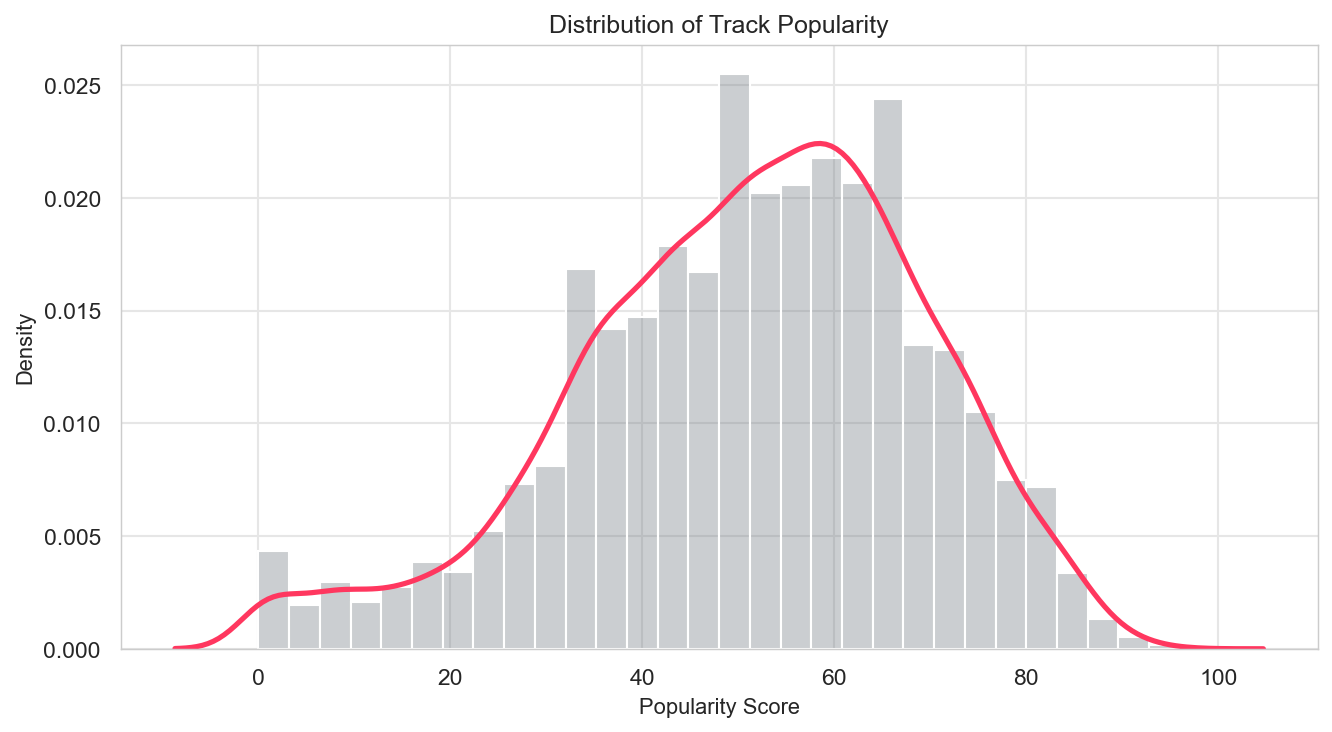

In [62]:
plt.figure(figsize=(9,5))

sns.histplot(
    df["track_popularity"],
    bins=30,
    stat="density",
    color=music_palette.gray,
    alpha=0.35,
    edgecolor=None
)
sns.kdeplot(
    df["track_popularity"],
    color=music_palette.apple,
    linewidth=2.5
)

plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

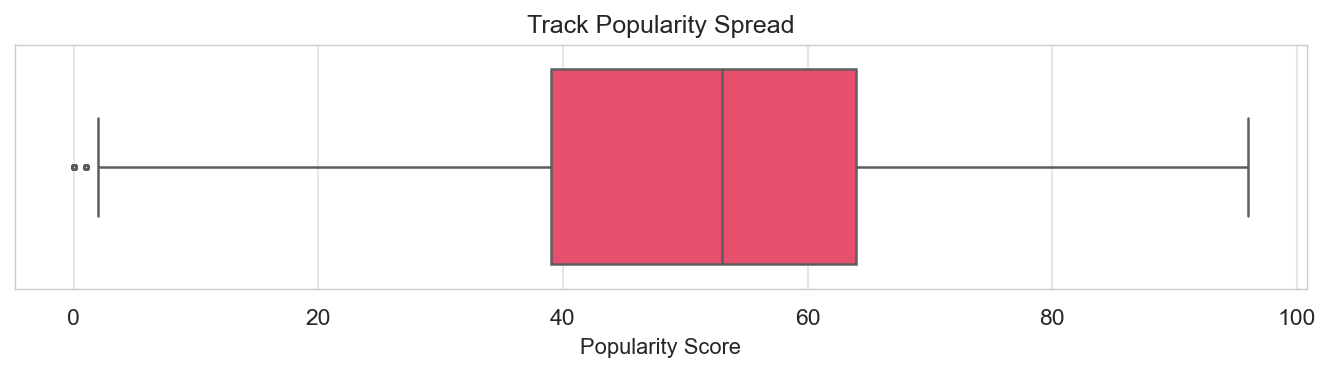

In [63]:
plt.figure(figsize=(9,2.6))

sns.boxplot(
    x=df["track_popularity"],
    color=music_palette.apple,
    linewidth=1.2,
    fliersize=2
)

plt.title("Track Popularity Spread")
plt.xlabel("Popularity Score")
plt.tight_layout()
plt.show()

In [64]:
print(f"popularity > .7 : {(df["track_popularity"] >= 70).mean()}")
print(f"popularity > .8 : {(df["track_popularity"] >= 80).mean()}")
print(f"popularity > .9 : {(df["track_popularity"] >= 90).mean()}")

popularity > .7 : 0.1469
popularity > .8 : 0.0384
popularity > .9 : 0.0021


- Hits are rare but not ultra-rare but, Super-hits (90+) are extreme outliers

In [65]:
print("===== Track Popularity Quantile =====")
print(df["track_popularity"].quantile([.25, .5, .75, .9, .95, .99]))

===== Track Popularity Quantile =====
0.25    39.0
0.50    53.0
0.75    64.0
0.90    73.0
0.95    78.0
0.99    85.6
Name: track_popularity, dtype: float64


### Key Findings — Track Popularity Distribution

- The popularity distribution is slightly left-skewed (skew = -0.47), indicating that the dataset is biased toward mid-to-high performing tracks rather than long-tail obscure music.
- Median popularity (53) is higher than the mean (51), reinforcing the concentration of tracks in the moderately successful range.
- The majority of tracks fall between 39 (25th percentile) and 64 (75th percentile), suggesting limited spread in mainstream popularity levels.
- High-popularity tracks are rare:
  - Only 14.7% exceed a popularity score of 70
  - 3.8% exceed 80
  - Just 0.2% exceed 90 (extreme outliers / super-hits)
- Popularity is strongly bounded: 99% of tracks are below ~86, meaning that top-tier success is statistically limited to a very small subset of music.
- This confirms that predicting hits is inherently an imbalanced problem and likely driven by structural and behavioral factors beyond average acoustic variation.


## 2. Artist Popularity → Track Popularity (H1)
Structural power effect vs track success

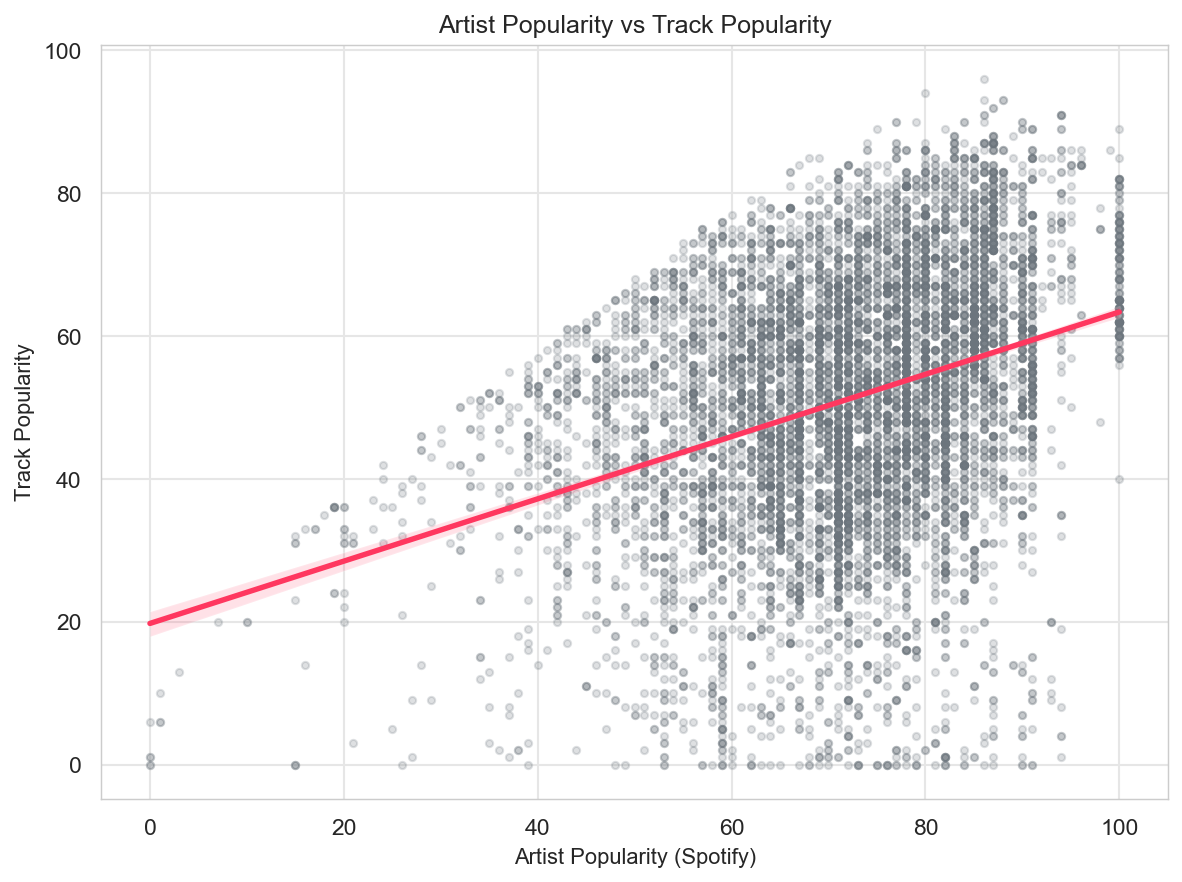

In [66]:
plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x="artist_popularity",
    y="track_popularity",
    scatter_kws={
        "s":12,
        "alpha":0.22,
        "color": music_palette.gray
    },
    line_kws={
        "linewidth":2.6,
        "color": music_palette.apple
    }
)

plt.title("Artist Popularity vs Track Popularity")
plt.xlabel("Artist Popularity (Spotify)")
plt.ylabel("Track Popularity")
plt.tight_layout()
plt.show()

In [67]:
df[["artist_popularity", "track_popularity"]].corr()

,artist_popularity,track_popularity
artist_popularity,1.000000,0.324323
track_popularity,0.324323,1.000000


In [68]:
df["artist_bin"] = pd.cut(
    df["artist_popularity"],
    bins=[0,20,40,60,80,100]
)

df.groupby("artist_bin")["track_popularity"].mean()

/var/folders/fv/hnh2s54s4h9_vv9q4x1rbdj40000gn/T/ipykernel_41961/658810316.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("artist_bin")["track_popularity"].mean()


artist_bin
(0, 20]      24.611111
(20, 40]     36.591463
(40, 60]     44.174116
(60, 80]     50.061879
(80, 100]    58.575163
Name: track_popularity, dtype: float64

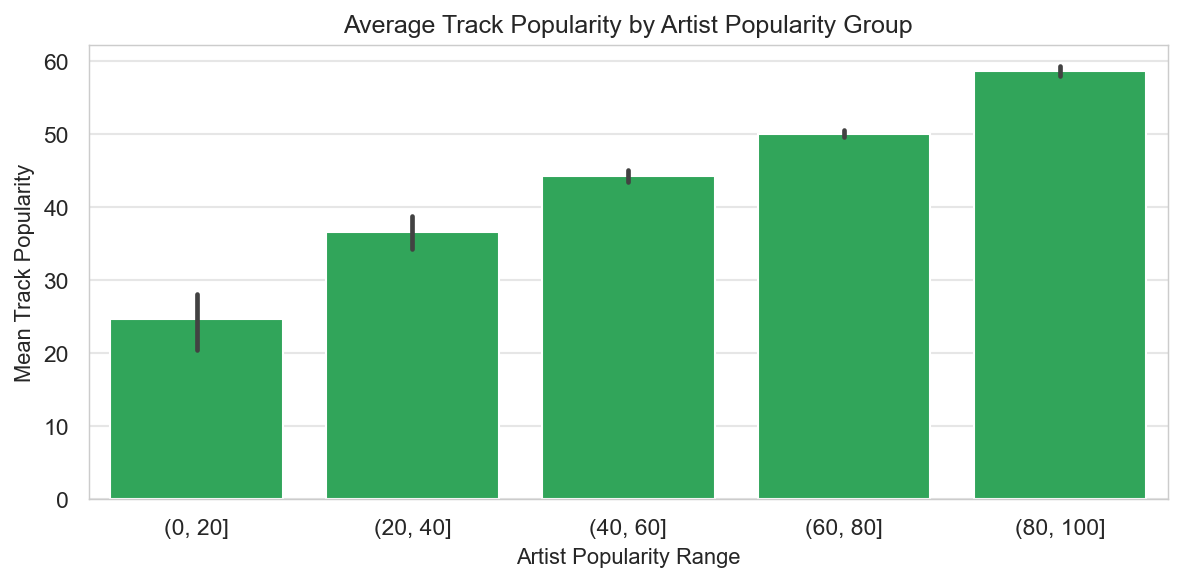

In [69]:
df["artist_bin"] = pd.cut(df["artist_popularity"], bins=[0,20,40,60,80,100])

plt.figure(figsize=(8,4))

sns.barplot(
    data=df,
    x="artist_bin",
    y="track_popularity",
    color=music_palette.spotify,
    errorbar="ci"
)

plt.title("Average Track Popularity by Artist Popularity Group")
plt.xlabel("Artist Popularity Range")
plt.ylabel("Mean Track Popularity")
plt.tight_layout()
plt.show()

### Key Findings — Artist Popularity and Track Success

- Artist popularity exhibits a clear positive relationship with track popularity (r = 0.32), indicating a moderate structural influence.
- The effect is monotonic across bins: tracks from higher-popularity artists consistently achieve higher average popularity scores.
- Low-popularity artists (0–20) average only ~24.6 in track popularity, while top-tier artists (80–100) average ~58.6 — more than double.
- However, substantial variability exists among highly popular artists, suggesting that fame increases visibility and exposure but does not guarantee track-level success.
- The asymmetry is notable: low-popularity artists rarely produce high-popularity tracks, whereas high-popularity artists produce both hits and underperforming tracks.
- This confirms that artist power acts as a baseline advantage floor within streaming platforms.

## 3. Audio Feature Diagnostics
Distribution + outliers for bpm, energy, brightness, noisiness, rhythm_strength

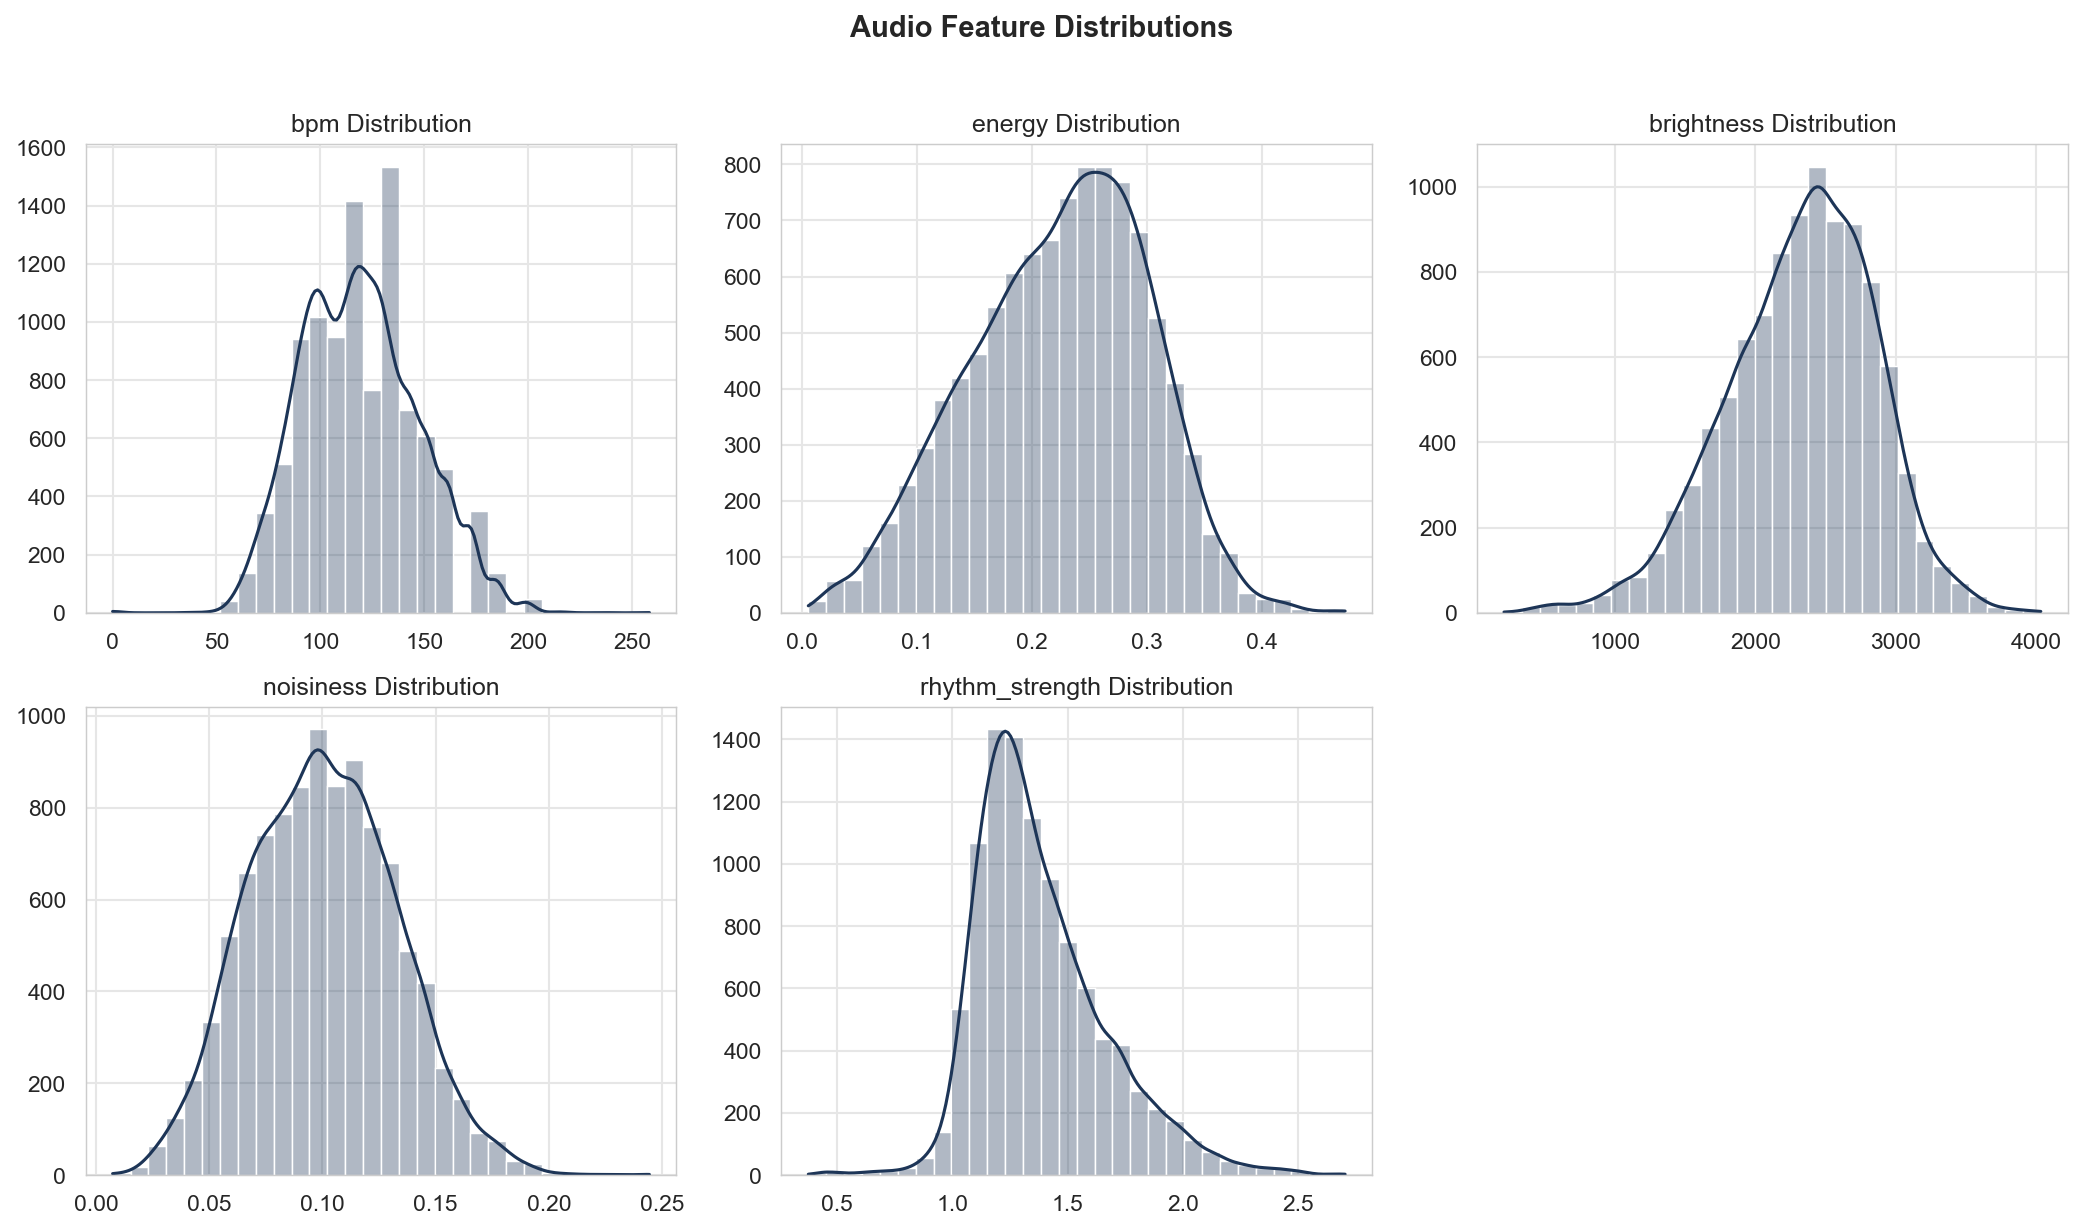

In [70]:
audio_cols = ["bpm", "energy", "brightness", "noisiness", "rhythm_strength"]

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(audio_cols):
    sns.histplot(
        df[col],
        bins=30,
        kde=True,
        ax=axes[i],
        color=music_palette.navy,
        alpha=0.35
    )
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.delaxes(axes[-1])

plt.suptitle("Audio Feature Distributions", y=1.02, fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

**BPM Distribution**
- BPM values cluster mainly between 100–150, consistent with mainstream pop tempo.
- Extreme high BPM outliers likely come from preview-based detection noise.

**Energy Distribution**
- Energy shows a smooth bell-shaped distribution.
- Strong variation across tracks suggests it may carry behavioral signal.

**Brightness Distribution**
- Brightness is right-skewed with wide spread.
- Indicates many tracks emphasize high-frequency content.

**Noisiness Distribution**
- Noisiness is concentrated around low values with some right-tail outliers.
- Reflects waveform sharpness in more percussive tracks.


**Rhythm Strength Distribution**
- Rhythm strength peaks around mid-range with a heavy right tail.
- Shows variability in percussive intensity across songs.

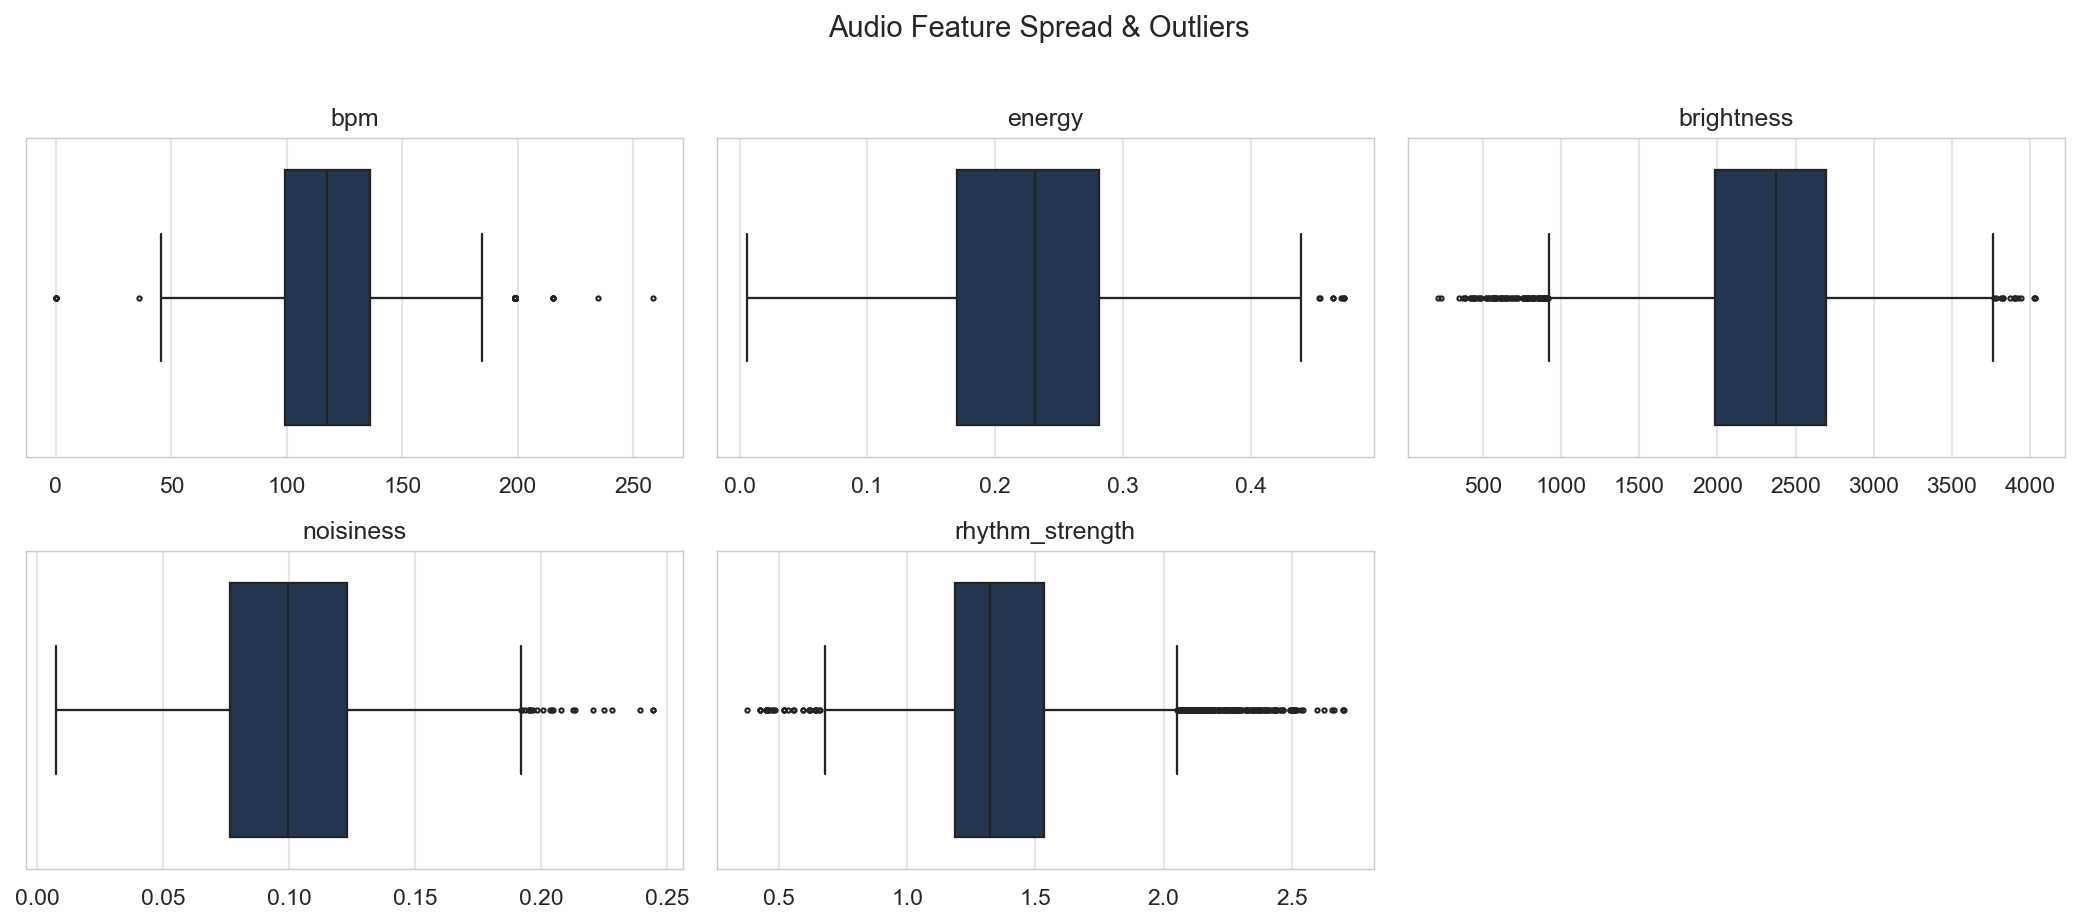

In [71]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()

for i, col in enumerate(audio_cols):
    sns.boxplot(
        x=df[col],
        ax=axes[i],
        color=music_palette.navy,
        linewidth=1.1,
        fliersize=2
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.delaxes(axes[-1])

plt.suptitle("Audio Feature Spread & Outliers", y=1.02, fontsize=14, fontweight="normal")
plt.tight_layout()
plt.show()

- Most audio features contain visible outliers.
- Outliers are expected due to short preview-based extraction.
- Distributions remain usable but may require clipping later.

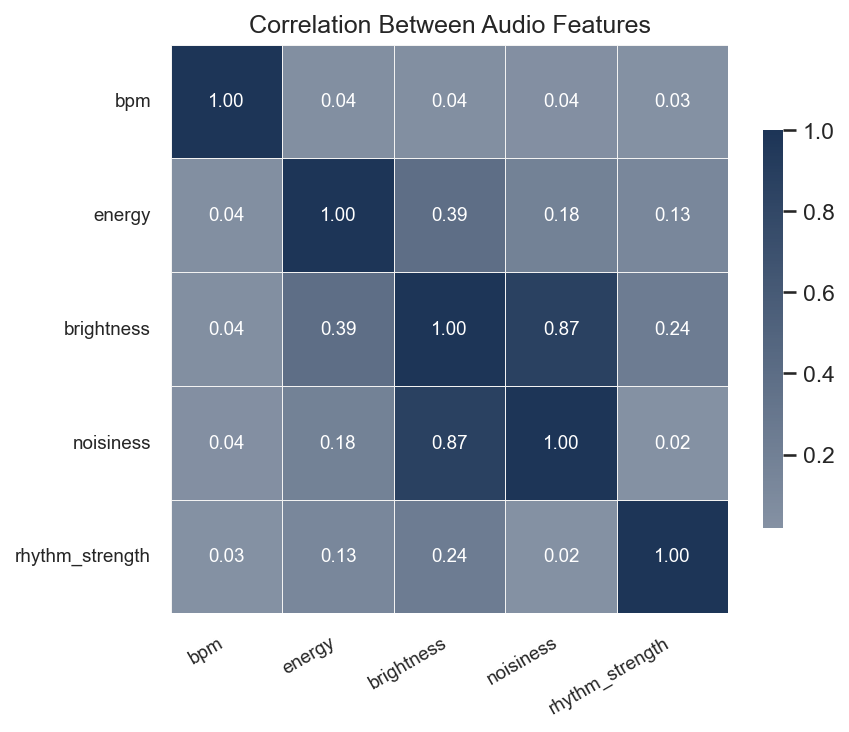

In [82]:
corr = df[["bpm","energy","brightness","noisiness","rhythm_strength"]].corr()

plt.figure(figsize=(6,5), dpi=150)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=sns.light_palette(MusicPalette.navy, as_cmap=True),
    center=0,
    linewidths=0.4,
    linecolor="#F2F2F2",
    annot_kws={"size":9},
    cbar_kws={"shrink":0.7}
)

plt.title("Correlation Between Audio Features", fontsize=12, weight="normal")
plt.xticks(rotation=30, ha="right", fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

- Brightness and noisiness are highly correlated (r = 0.87), indicating redundancy.
- BPM is nearly independent from other acoustic features.
- Energy moderately relates to brightness (0.39), suggesting louder songs tend to have sharper spectral profiles.

### Key Findings - Audio Features Diagnostics

- Librosa-derived audio features display structured and realistic distributions.
- BPM remains largely independent from other acoustic characteristics.
- Brightness and noisiness capture overlapping high-frequency signals, requiring reduction in later modeling.
- Energy and rhythm-related measures show strong variability across tracks.
- Overall, the audio feature space is stable and valid for testing their influence on track popularity.

## 4. Audio Features → Track Popularity (H3)
Feature-level relationships + correlation ranking

In [73]:
audio_cols = ["bpm","energy","brightness","noisiness","rhythm_strength"]

df[audio_cols + ["track_popularity"]].corr()["track_popularity"].sort_values(ascending=False)

track_popularity    1.000000
rhythm_strength     0.109194
brightness          0.047209
energy              0.023016
noisiness           0.009241
bpm                -0.007386
Name: track_popularity, dtype: float64

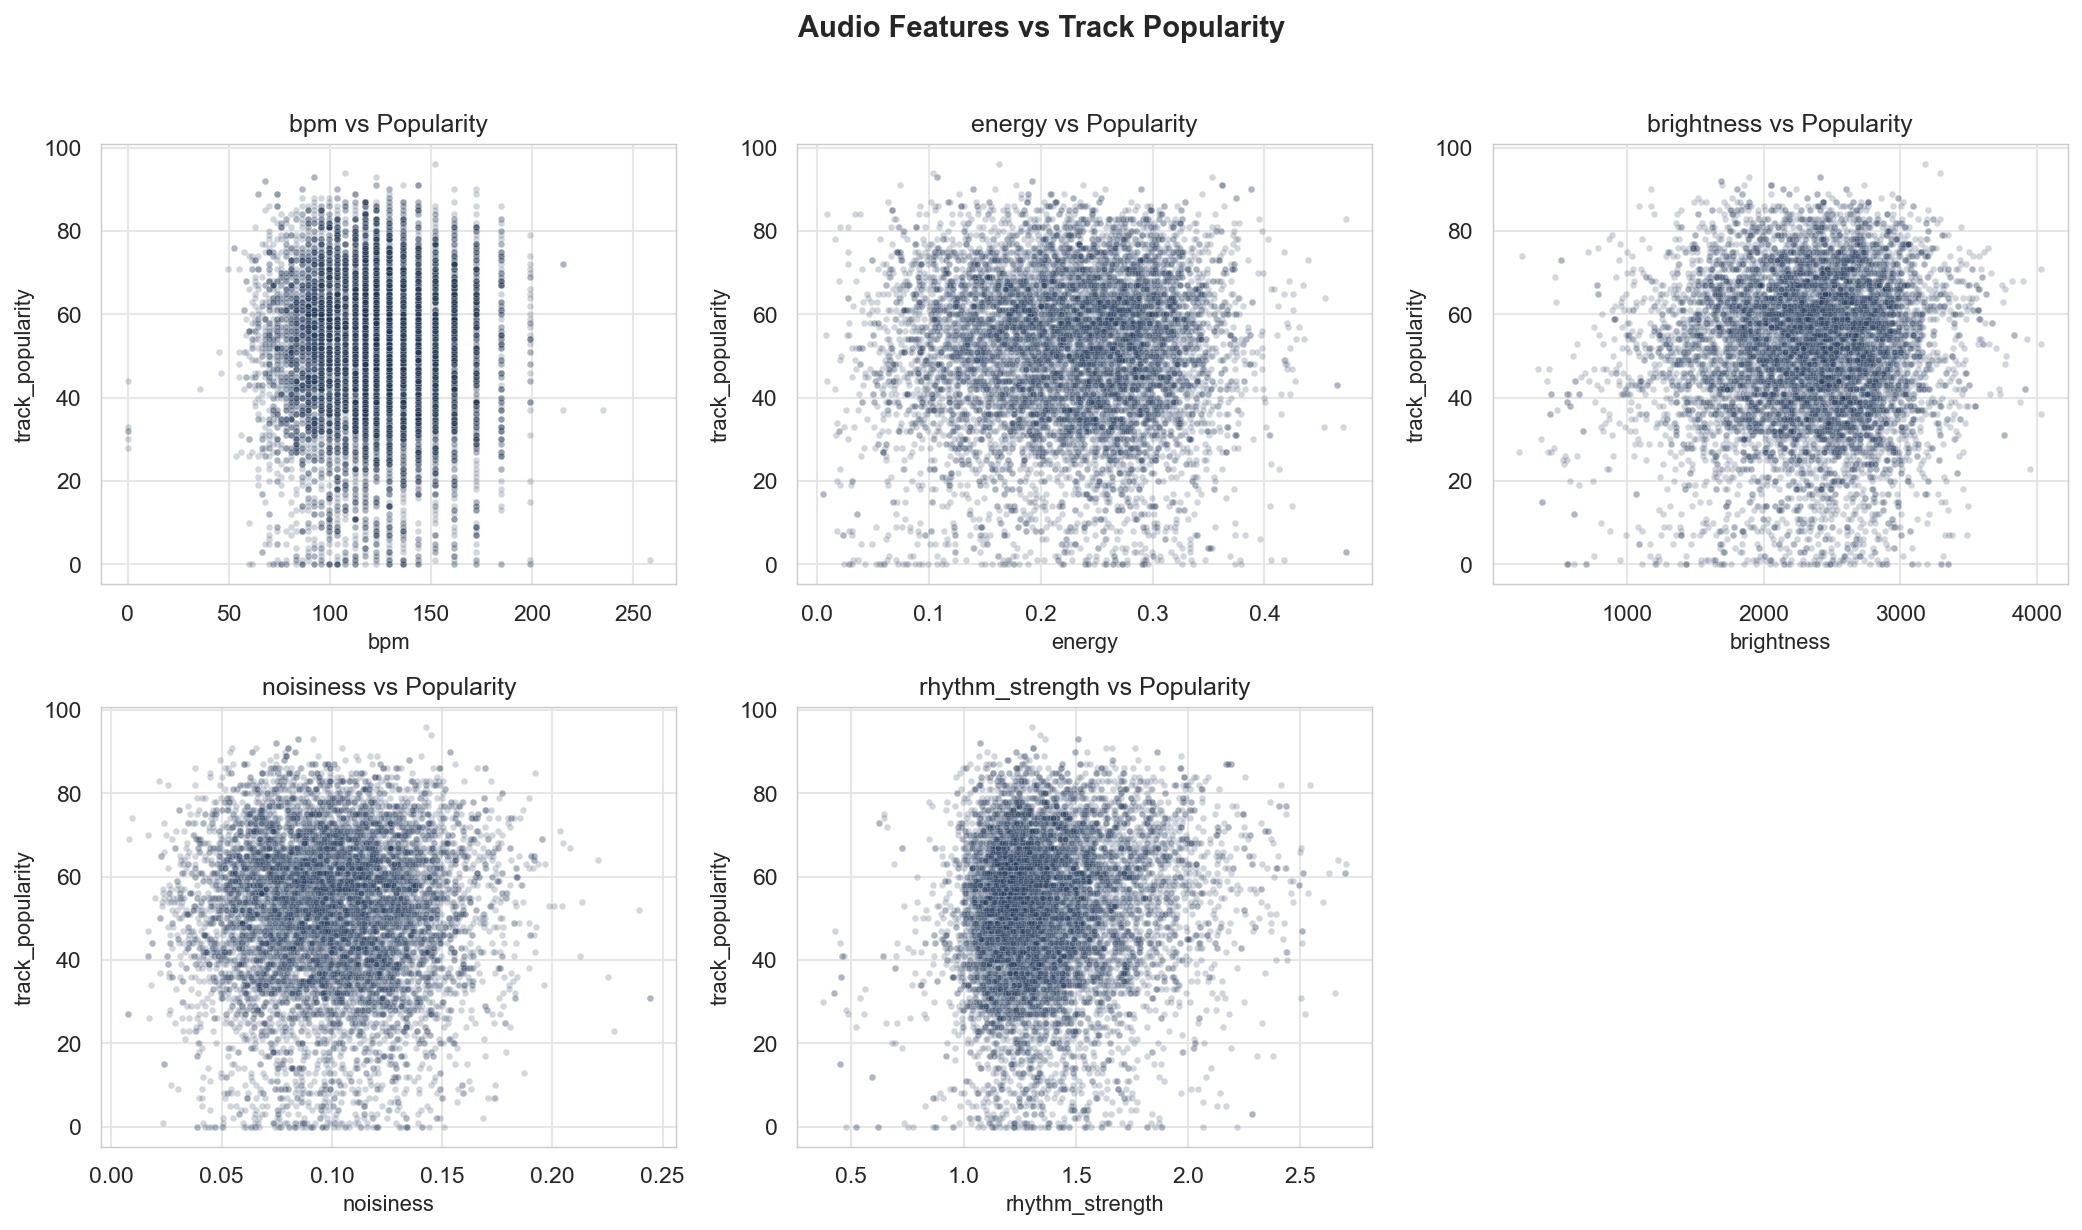

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(14,8))
axes = axes.flatten()

for i, col in enumerate(audio_cols):
    sns.scatterplot(
        data=df,
        x=col,
        y="track_popularity",
        ax=axes[i],
        color=music_palette.navy,
        alpha=0.2,
        s=10
    )
    axes[i].set_title(f"{col} vs Popularity")

fig.delaxes(axes[-1])

plt.suptitle("Audio Features vs Track Popularity", y=1.02, fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [75]:
df["energy_bin"] = pd.qcut(df["energy"], 5)
labels = ["Very Low", "Low", "Medium", "High", "Very High"]
df["energy_bin_label"] = pd.qcut(df["energy"], 5, labels=labels)

df.groupby("energy_bin_label", observed=True)["track_popularity"].mean()

energy_bin_label
Very Low     50.305556
Low          51.322647
Medium       51.587838
High         50.716667
Very High    51.575357
Name: track_popularity, dtype: float64

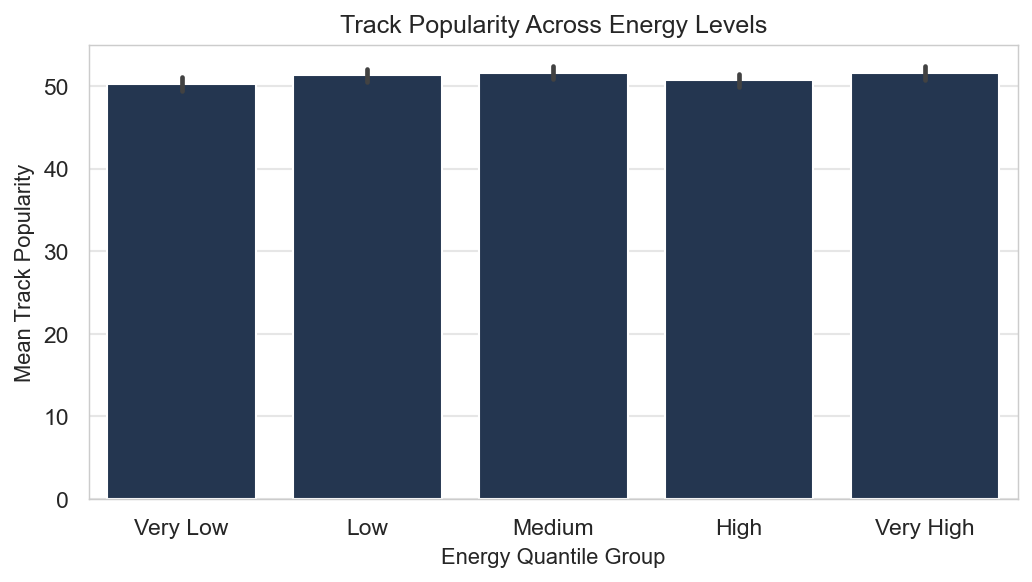

In [76]:
plt.figure(figsize=(7,4))

sns.barplot(
    data=df,
    x="energy_bin_label",
    y="track_popularity",
    color=music_palette.navy,
    errorbar="ci"
)

plt.title("Track Popularity Across Energy Levels")
plt.xlabel("Energy Quantile Group")
plt.ylabel("Mean Track Popularity")
plt.tight_layout()
plt.show()

### Key Findings — Audio Features and Track Popularity

- Among all acoustic variables, rhythm strength shows the highest correlation with track popularity (r = 0.11), indicating only a weak positive relationship.
- Brightness exhibits minimal association with popularity (r = 0.05), suggesting that high-frequency intensity alone does not drive streaming success.
- Energy demonstrates virtually no relationship with track popularity (r = 0.02); popularity remains flat across all energy quantiles.
- Noisiness contributes negligible predictive value and largely overlaps with brightness.
- BPM shows no meaningful relationship with popularity and appears structurally independent from listener engagement.
- Overall, audio features provide only marginal explanatory power compared to artist/platform-driven factors observed earlier.
- These results indicate that streaming popularity is weakly influenced by acoustic characteristics and is more strongly shaped by structural exposure mechanisms.

## 5. Hit vs Non-Hit Differences
Comparing feature distributions across success groups

In [77]:
hit_cut = df["track_popularity"].quantile(0.90)
df["is_hit"] = (df["track_popularity"] >= hit_cut).astype(int)

hit_cut

np.float64(73.0)

In [78]:
audio_cols = ["bpm","energy","brightness","noisiness","rhythm_strength"]

df.groupby("is_hit")[audio_cols].mean()

,bpm,energy,brightness,noisiness,rhythm_strength
is_hit,,,,,
0,119.172688,0.223617,2320.563904,0.100435,1.375882
1,117.696940,0.226174,2354.789006,0.100123,1.443684


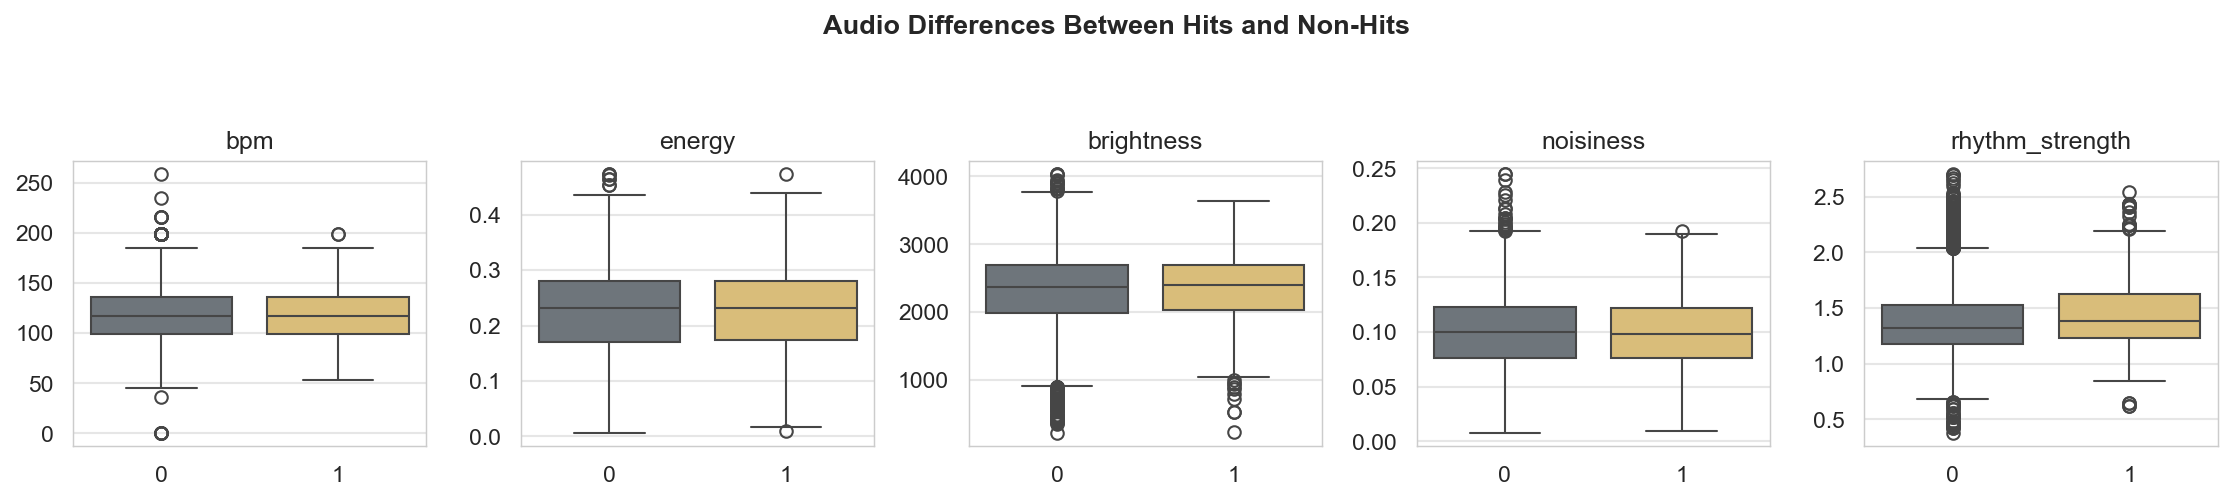

In [79]:
fig, axes = plt.subplots(1,5, figsize=(15,3))

for i,col in enumerate(audio_cols):
    sns.boxplot(
        data=df,
        x="is_hit",
        y=col,
        hue="is_hit",
        ax=axes[i],
        palette={0: music_palette.gray, 1: music_palette.gold},
        legend=False
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle("Audio Differences Between Hits and Non-Hits", y=1.1, fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

## 6. Key EDA Insights
Bullet summary of what looks real vs what looks weak/noisy

### Key EDA Insights

- Track popularity distribution is moderately left-skewed, with strong concentration in mid-range values.
- Artist popularity exerts a clear structural influence on track performance (r = 0.32), creating a strong baseline advantage for well-known artists.
- Audio features exhibit realistic variation but weak relationships with popularity.
- Rhythm strength shows the only noticeable acoustic association with hits, though the effect remains small.
- Energy and BPM do not differentiate successful tracks.
- Brightness and noisiness capture overlapping high-frequency characteristics, requiring reduction for modeling.
- Overall, popularity on streaming platforms appears driven primarily by artist/platform exposure rather than acoustic superiority.